In [1]:
import numpy as np
import matplotlib.pyplot as plt
import serial
from time import sleep
import pandas as pd

In [104]:
sr542 = serial.Serial(port = 'COM4', baudrate=115200, timeout=2)
print(sr542.name)

COM4


In [3]:
def serialQry(port, command):
    port.reset_input_buffer()
    port.write((command + '\r').encode('ascii'))
    return port.readline().decode('ascii').strip() #strip removes white space

def serialCmd(port, command):
    port.reset_input_buffer()
    port.write((command + '\r').encode('ascii'))
    
def serialRead(port):
    return port.readline().decode('ascii').strip()

In [105]:
serialQry(sr542, '*IDN?')

'Stanford_Research_Systems,SR542,s/n00000001,v0.10'

In [106]:
# enable factory mode
serialCmd(sr542, 'BSRS 1, 314159265')
serialQry(sr542, 'BSRS?')

'1'

In [107]:
serialCmd(sr542, '$CHT DNLD')

In [108]:
serialQry(sr542, '$CSR?')

'20460001'

In [109]:
serialCmd(sr542, '$UCL ON')
serialQry(sr542, '$UCL?')

'1'

In [110]:
serialQry(sr542, '$CIR?')

'65'

In [60]:
serialQry(sr542, '$ROF?')

'150'

In [31]:
float(serialQry(sr542, 'AMPL?').split(', ')[1])

0.590471

In [43]:
serialQry(sr542, 'KPHA?')

'0.0000, 0.0000, 0.0000'

In [42]:
serialCmd(sr542, 'KPHA 0, 0 ,0')

In [44]:
initialOffset = 26
finalOffset = 66
N = 100

avgCurrent = []
stdCurrent = []
offsets = np.arange(initialOffset, finalOffset, 1)
for offset in np.arange(initialOffset, finalOffset, 1):
    serialCmd(sr542, f'$ROF {offset}')
    # then measure the necessary Q current N times
    sleep(3.0)
    current_Q = np.zeros(N)
    for i in range(0, N):
        current_Q[i] = float(serialQry(sr542, 'AMPL?').split(', ')[1])
        sleep(.1)
        
    avgCurrent.append(np.mean(current_Q))
    stdCurrent.append(np.std(current_Q))        
    

In [45]:
offsets = np.arange(initialOffset, finalOffset, 1)

In [46]:
coeffs = np.polyfit(offsets, avgCurrent, 2)
p = np.poly1d(coeffs)
coeffs

array([ 7.41666681e-05, -6.75006868e-03,  7.25310565e-01])

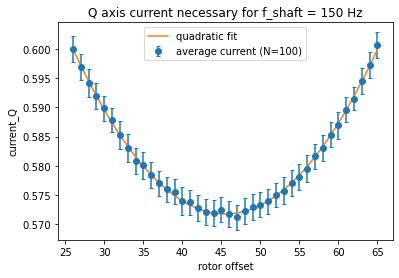

In [47]:
plt.errorbar(offsets, avgCurrent, yerr=stdCurrent, capsize=2, marker='o', linestyle='none', label='average current (N=100)')
plt.plot(offsets, p(offsets), label='quadratic fit')
plt.xlabel('rotor offset')
plt.ylabel('current_Q')
plt.title('Q axis current necessary for f_shaft = 150 Hz')
plt.legend()

In [48]:
offsets[np.argmin(p(offsets))]

46

In [59]:
serialQry(sr542, '$CIR?')

'65'

In [36]:
serialCmd(sr542, '$CIR 65')

In [37]:
serialCmd(sr542, '$CHT UPLD')

In [37]:
dp_doffset = np.polyder(p)
dp_doffset

poly1d([ 0.00013719, -0.04763281])

In [23]:
serialQry(sr542, 'MWAN?')

'0'

In [23]:
serialQry(sr542, 'LERR?')

'0'